In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [182]:
df = pd.read_csv("uber.csv")

In [183]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [185]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [187]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [188]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [189]:
df.dropna(inplace=True)

In [190]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

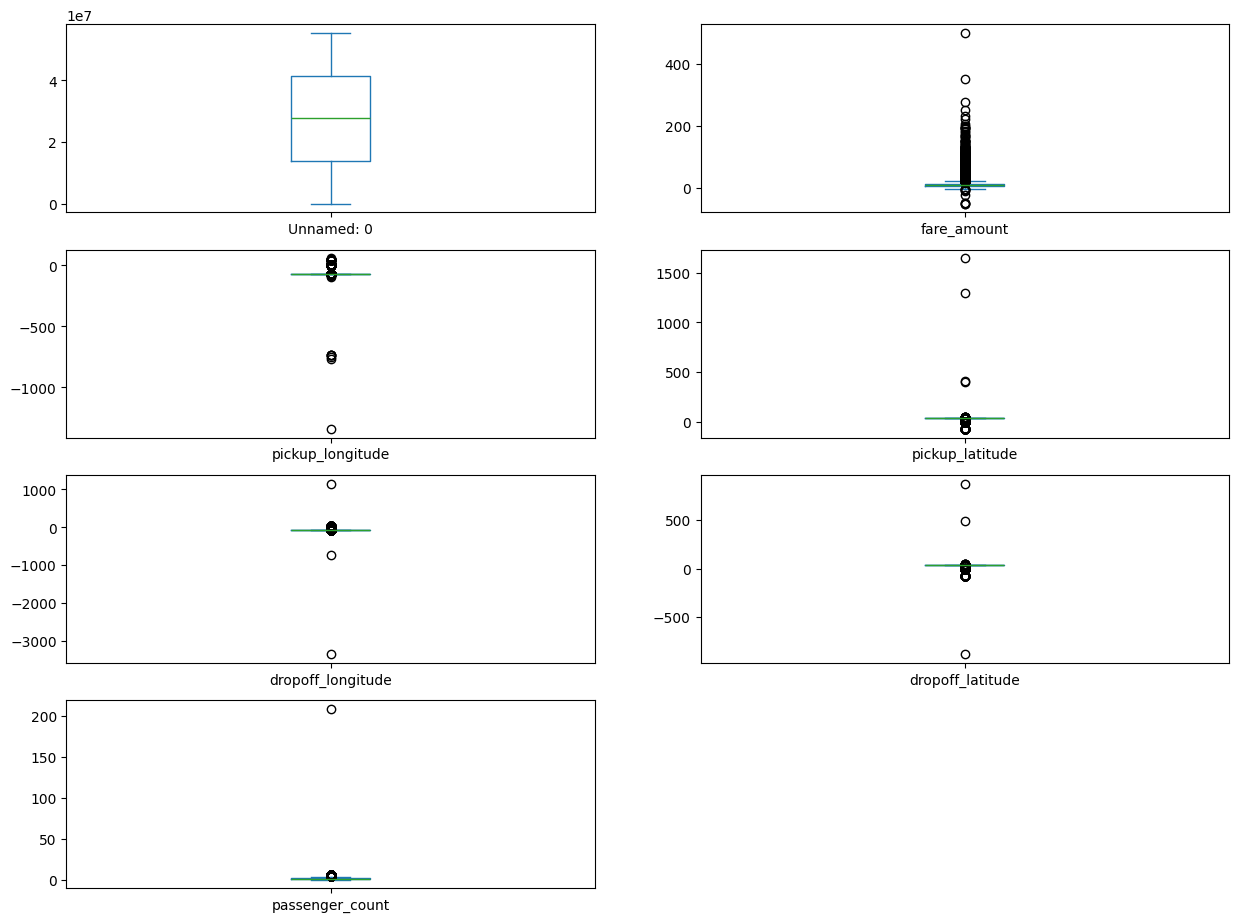

In [191]:
df.plot(kind = 'box', subplots = True, layout = (7, 2), figsize = (15, 20))
plt.show()

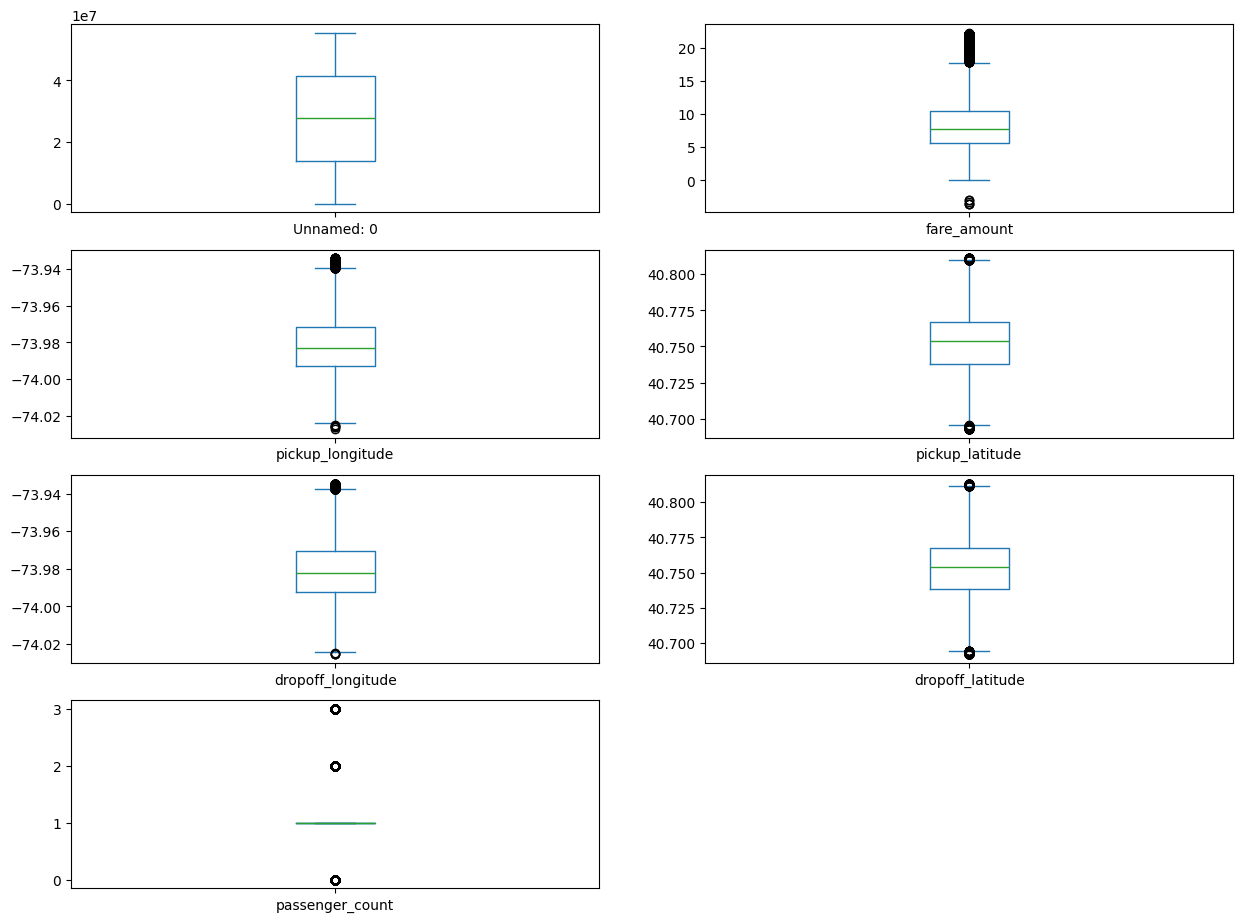

In [192]:

def remove_outlier(df1 , col):
    df1[col] = pd.to_numeric(df1[col], errors='coerce')  # Convert to numeric, non-numeric becomes NaN
    # Drop rows with NaN values
    df1 = df1.dropna(subset=[col])
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Remove outliers
    df1 = df1[(df1[col] >= lower_limit) & (df1[col] <= upper_limit)]
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

# Apply the function to columns
df = treat_outliers_all(df, df.select_dtypes(include=['float64', 'int64']).columns)

# Plot the data after outlier removal
df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(15, 20))
plt.show()


In [193]:
from math import cos, asin, sqrt, pi
import numpy as np

def distance(lat_1,lon_1,lat_2,lon_2):
#     lat1 = row.pickup_latitude
#     lon1 = row.pickup_longitude
#     lat2 = row.dropoff_latitude
#     lon2 = row.dropoff_longitude
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +  np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

temp = distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
5    0.000000
dtype: float64

In [194]:
df_new = df.copy()
df_new['Distance'] = temp
df = df_new
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000


In [195]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour

In [196]:
df.drop(columns=['pickup_datetime','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude', 'week_day', 'Unnamed: 0', 'key'],inplace=True)
df.head()

,fare_amount,passenger_count,Distance,Year,Month,Hour
0,7.5,1,1.683323,2015,5,19
1,7.7,1,2.457590,2009,7,20
2,12.9,1,5.036377,2009,8,21
3,5.3,3,1.661683,2009,6,8
5,4.9,1,0.000000,2011,2,2


In [197]:
df.corr()

,fare_amount,passenger_count,Distance,Year,Month,Hour
fare_amount,1.000000,0.019572,0.806996,0.154908,0.028798,0.006046
passenger_count,0.019572,1.000000,0.013809,-0.022708,0.007192,0.034175
Distance,0.806996,0.013809,1.000000,-0.019150,0.002186,-0.014879
Year,0.154908,-0.022708,-0.019150,1.000000,-0.114230,0.005443
Month,0.028798,0.007192,0.002186,-0.114230,1.000000,-0.003213
Hour,0.006046,0.034175,-0.014879,0.005443,-0.003213,1.000000


In [198]:
from sklearn.preprocessing import StandardScaler
x = df[['Distance']].values
y = df['fare_amount'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.transform(y_test)

from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)

In [199]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

R-squared:  0.6529067176368957
RMSE:  0.588853062470853
MAE:   0.42497652904826083


In [200]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

R-squared:  0.5222148916201156
RMSE:  0.6908760515288561
MAE:   0.49801617029535356
